<a href="https://colab.research.google.com/github/chunyao0722/20230205-Python/blob/main/20230219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20230219 筆記

## 回答問題

### Q: "%" 怎麼使用？

參考：https://python.microbit.org/v/3

嘗試執行底下程式，按按鈕A觀察結果！

```python
# Imports go at the top
from microbit import *

display.clear()

x = 0
y = 0
display.set_pixel(x,y,9)

while True:
    if button_a.was_pressed():
        x = x + 1
        display.clear()
        display.set_pixel(x%5,y,9)
```

## 複習一下 requests 的使用

從政府資料開放平台抓資料：https://data.gov.tw/

### 練習

抓取`年度國內主要金融指標`下來做分析:

https://apiservice.mol.gov.tw/OdService/download/A17000000J-030244-dpp

In [ ]:
import requests

In [ ]:
url = "https://apiservice.mol.gov.tw/OdService/download/A17000000J-030244-dpp"

In [ ]:
data = requests.get(url).json()

In [ ]:
# 列出data裡面的東西
data

In [ ]:
# 檢視data的資料型態
type(data)

list

In [ ]:
# 檢視一下 data 裡面有幾筆資料
len(data)

29

In [ ]:
# 檢視一下 data 的第一筆資料
data[0]

{'年度': '1994',
 '貨幣供給額期底年增率-M1B': '12.23',
 '貨幣供給額期底年增率-M2': '15.07',
 '金價（美元／英兩）-國際現貨黃金價格': '382.50',
 '金價（美元／英兩）-台北': '385.07',
 '匯率（月底）-（新台幣／美元）': '26.240',
 '外匯存底（億美元）': '924.54',
 '利率（年息%）-金融業拆款': '6.130',
 '利率（年息%）-商業本票31-90天期': '6.77',
 '利率（年息%）-中央銀行重貼現率': '5.500',
 '利率（年息%）-債券市場（十年期中央政府公債）': '7.24',
 '證券（集中市場）-發行量加權股價指數（月底）': '7124.66',
 '證券（集中市場）-成交值（億元）': '194766'}

### 列出各年度的M2貨幣供給額

#### 方法一

In [ ]:
for i in data:
  print(i['年度'], "==>", i['貨幣供給額期底年增率-M2'])

1994 ==> 15.07
1995 ==> 9.42
1996 ==> 9.13
1997 ==> 8.02
1998 ==> 8.56
1999 ==> 8.29
2000 ==> 6.50
2001 ==> 4.31
2002 ==> 2.53
2003 ==> 5.68
2004 ==> 7.19
2005 ==> 6.63
2006 ==> 5.15
2007 ==> 0.84
2008 ==> 7.21
2009 ==> 5.78
2010 ==> 5.44
2011 ==> 4.84
2012 ==> 3.46
2013 ==> 5.79
2014 ==> 6.13
2015 ==> 5.80
2016 ==> 3.55
2017 ==> 3.56
2018 ==> 2.65
2019 ==> 4.52
2020 ==> 9.36
2021 ==> 7.35
2022 ==> 6.74


#### 方法二

In [ ]:
for i in range(len(data)):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [ ]:
for i in range(len(data)):
  print(data[i]['年度'], "==>", data[i]['貨幣供給額期底年增率-M2'])

1994 ==> 15.07
1995 ==> 9.42
1996 ==> 9.13
1997 ==> 8.02
1998 ==> 8.56
1999 ==> 8.29
2000 ==> 6.50
2001 ==> 4.31
2002 ==> 2.53
2003 ==> 5.68
2004 ==> 7.19
2005 ==> 6.63
2006 ==> 5.15
2007 ==> 0.84
2008 ==> 7.21
2009 ==> 5.78
2010 ==> 5.44
2011 ==> 4.84
2012 ==> 3.46
2013 ==> 5.79
2014 ==> 6.13
2015 ==> 5.80
2016 ==> 3.55
2017 ==> 3.56
2018 ==> 2.65
2019 ==> 4.52
2020 ==> 9.36
2021 ==> 7.35
2022 ==> 6.74


## 資料分析基礎套件

* numpy ==> 科學運算基礎套件
* matplotlib ==> 繪圖基礎套件
* pandas ==> 資料分析基礎套件

### 套件載入的慣用法

```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
```

### NumPy

NumPy ==> **Num**erical **Py**thon

* ndarray (多維陣列) ==> N-Dimensional Arrays
* ufunc (通用函式) ==> Universal Functions

In [ ]:
import numpy as np

### ndarray

#### 原生的python的容器型別的限制

無法簡單的做到科學運算(向量運算)！

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]

In [ ]:
x + y

[1, 2, 3, 4, 5, 6]

In [ ]:
2 * x

[1, 2, 3, 1, 2, 3]

#### 使用numpy的ndarray來解決科學運算的問題

In [ ]:
x1 = np.array(x)
y1 = np.array(y)

In [ ]:
type(x1)

numpy.ndarray

In [ ]:
x1

array([1, 2, 3])

In [ ]:
y1

array([4, 5, 6])

In [ ]:
x1 + y1

array([5, 7, 9])

In [ ]:
2 * x1

array([2, 4, 6])

### ufunc

#### 原生的python的數學運算

In [ ]:
import math

In [ ]:
math.pi

3.141592653589793

In [ ]:
math.sin(math.pi/2)

1.0

In [ ]:
math.sin(x)

TypeError: ignored

#### 比較一下 numpy 的使用

In [ ]:
np.pi

3.141592653589793

In [ ]:
np.sin(np.pi/2)

1.0

In [ ]:
np.sin(x)

array([0.84147098, 0.90929743, 0.14112001])

### ndarray 附帶的屬性 (properties)

In [ ]:
x

[1, 2, 3]

In [ ]:
x1

array([1, 2, 3])

In [ ]:
# 資料型態
x1.dtype

dtype('int64')

In [ ]:
# 資料的形狀
x1.shape

(3,)

In [ ]:
# 資料的個數
x1.size

3

### ndarray 的 indexing 跟 slicing

In [ ]:
# np.arange() 類似 range()，但是會產生ndarray
F = np.arange(25)

In [ ]:
F

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
F.dtype

dtype('int64')

In [ ]:
F.shape

(25,)

In [ ]:
F.reshape(5, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
F

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
G = F.reshape(5, 5)

In [ ]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
G.shape

(5, 5)

#### indexing

In [ ]:
F

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
F[0]

0

In [ ]:
F[-1]

24

In [ ]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
G[2]

array([10, 11, 12, 13, 14])

In [ ]:
G[2][2]

12

In [ ]:
G[2, 2]

12

#### slicing

In [ ]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
G[1:3, 1:3]

array([[ 6,  7],
       [11, 12]])

## 回答問題

### Q: 如果np的ufunc都會主動將list轉換成ndarray，我們是不是可以省略 np.array(x) 這樣的轉換？

In [ ]:
x

[1, 2, 3]

In [ ]:
x ** 2

TypeError: ignored

In [ ]:
x1 ** 2

array([1, 4, 9])

### 練習

請問如何取得二維的ndarray的第一欄及最後一欄的資料？

In [ ]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
G[:,0]

array([ 0,  5, 10, 15, 20])

In [ ]:
G[:,-1]

array([ 4,  9, 14, 19, 24])

In [ ]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
G[:, 0] = 0

In [ ]:
G

array([[ 0,  1,  2,  3,  4],
       [ 0,  6,  7,  8,  9],
       [ 0, 11, 12, 13, 14],
       [ 0, 16, 17, 18, 19],
       [ 0, 21, 22, 23, 24]])

In [ ]:
G[1:3, 1:3]

array([[ 6,  7],
       [11, 12]])

In [ ]:
G[1:3, 2]

array([ 7, 12])

## MatPlotLib

MatPlotLib ==> **Mat**rix **Plot**ting **Lib**rary

* pyplot
* artist

Reference:
https://matplotlib.org/stable/index.html

In [ ]:
import matplotlib.pyplot as plt

### 折線圖 (Line Chart)

In [ ]:
x

[1, 2, 3]

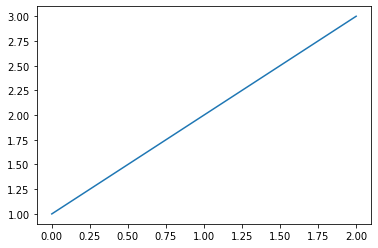

In [ ]:
plt.plot(x)

### Markers, Line Styles, Colors

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

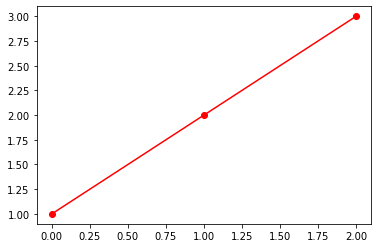

In [ ]:
plt.plot(x, "ro-")

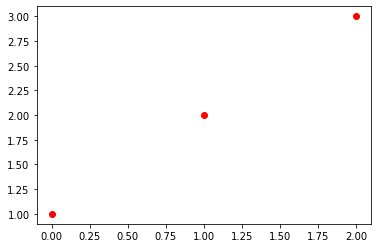

In [ ]:
plt.plot(x, "ro")

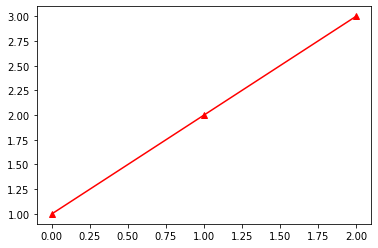

In [ ]:
plt.plot(x, "^r-")

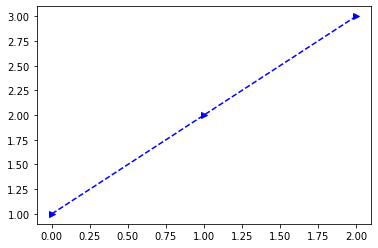

In [ ]:
plt.plot(x, "b>--")

In [ ]:
x

[1, 2, 3]

In [ ]:
x**2

TypeError: ignored

In [ ]:
x1

array([1, 2, 3])

In [ ]:
x1**2

array([1, 4, 9])

In [ ]:
x1**3

array([ 1,  8, 27])

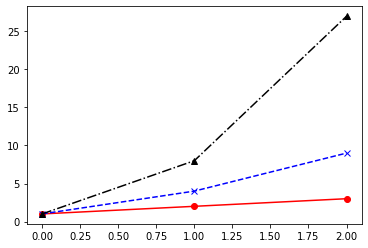

In [ ]:
plt.plot(x1, "ro-")
plt.plot(x1**2, "bx--")
plt.plot(x1**3, "k^-.")

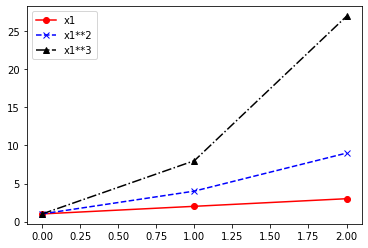

In [ ]:
plt.plot(x1, "ro-", label="x1")
plt.plot(x1**2, "bx--", label="x1**2")
plt.plot(x1**3, "k^-.", label="x1**3")
plt.legend()

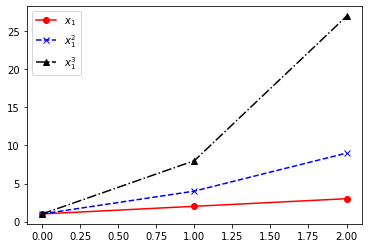

In [ ]:
plt.plot(x1, "ro-", label="$x_1$")
plt.plot(x1**2, "bx--", label="$x_1^2$")
plt.plot(x1**3, "k^-.", label="$x_1^3$")
plt.legend()

Text(0.5, 1.0, 'The power of x1')

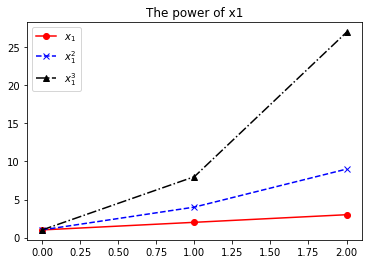

In [ ]:
plt.plot(x1, "ro-", label="$x_1$")
plt.plot(x1**2, "bx--", label="$x_1^2$")
plt.plot(x1**3, "k^-.", label="$x_1^3$")
plt.legend()
plt.title("The power of x1")

Text(0, 0.5, 'Axis y')

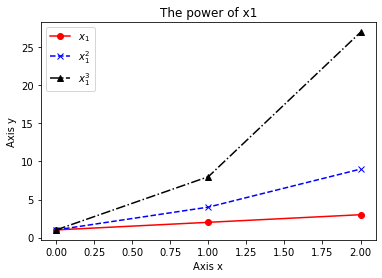

In [ ]:
plt.plot(x1, "ro-", label="$x_1$")
plt.plot(x1**2, "bx--", label="$x_1^2$")
plt.plot(x1**3, "k^-.", label="$x_1^3$")
plt.legend()
plt.title("The power of x1")
plt.xlabel("Axis x")
plt.ylabel("Axis y")

### 長條圖 (Bar Chart)

In [ ]:
x

[1, 2, 3]

In [ ]:
plt.bar?

In [ ]:
c = ['a', 'b', 'c']

<BarContainer object of 3 artists>

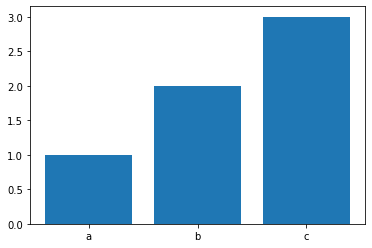

In [ ]:
plt.bar(c, x)

### 圓餅圖 (Pie Chart)

In [ ]:
plt.pie?

([<matplotlib.patches.Wedge at 0x7fc6a32c50a0>,
 [Text(0.9526279355804298, 0.5500000148652441, 'a'),
  Text(-0.5500000594609755, 0.9526279098330699, 'b'),
  Text(1.0298943251329445e-07, -1.0999999999999954, 'c')])

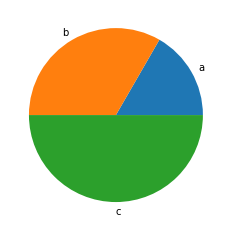

In [ ]:
plt.pie(x, labels=c)

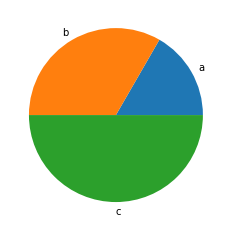

In [ ]:
plt.pie(x, labels=c);

## 補充說明：

Python 常用來做影像處理的套件，大概有三個：

* pillow (PIL)
* skimage
* opencv


In [ ]:
from PIL import Image

In [ ]:
lin = Image.open('lin.jpg')

In [ ]:
lin_array = np.array(lin)

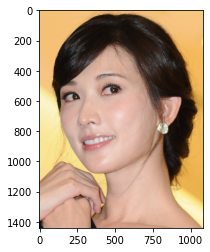

In [ ]:
plt.imshow(lin_array)

## Pandas

* Series
* DataFrame